### Imports

In [58]:
import numpy as np
import scipy
import pandas as pd
import sklearn as sk
import time
import math
from math import pi

import matplotlib.pyplot as plt

In [59]:
avg_work_hrs_yr = 40 * 52
print(avg_work_hrs_yr)

2080


In [70]:
# hours = pd.readcsv('work_hours.csv')
# hr_per_week = pd.readcsv('work_week.csv')

# set hourly rate
# rates = pd.readcsv('hourly_rate.csv')

# deduction = pd.readcsv('deductions.csv')

hours = np.loadtxt("work_hours.txt")
hours_per_week = np.loadtxt("work_week.txt")
hourly_rates = np.loadtxt("hourly_rate.txt")
pre_tax_deduction = np.loadtxt("pre_tax_deductions.txt")
# salary = np.loadtxt("annual_salary.txt")

In [154]:
hours_worked_so_far = []
def weeks_worked(): 
    for i in hours:
        if i != 0:
            hours_worked_so_far.append(i)
    return len(hours_worked_so_far)

print(weeks_worked())

5


### Deductions

##### Need to make updatable via outside txt file

In [61]:
def marital_status(string):
    pass

In [62]:
def deductions_from_taxable_income():
    for item in pre_tax_deductions:
        pass #increases the total amount to be deducted by the new item.

In [63]:
# tax_brackets = pd.read_excel("tax_brackets.xlsx")
# Use the above to update the bracket estimation

def tax_bracket_estimation(total_gross_income):
    if 0.00 < total_gross_income <= 9700:
        tax_bracket = (total_gross_income - deductions()) * 0.10
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 9700 < total_gross_income <= 39475:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.12
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 39475 < total_gross_income <= 84200:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.22
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 84200 < total_gross_income <= 160725:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.24
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 160725 < total_gross_income < 204100:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.32
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    elif 204100 < total_gross_income < 510300:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.35
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket
    else:
        tax_bracket = (total_gross_income - marital_status() - deductions()) * 0.37
        tax_bracket = round(tax_bracket, 2)
        return tax_bracket

### Compute gross income

###### temporary test values

In [174]:
#hours = 40
#hourly_rates = 20.92
#pre_tax_deductions = 300

monthly_wage = sum(hours) * hourly_rates
#Bug in weeks_worked() that causes it to keep counting

print(sum(hours))
print(hourly_rates)
print(monthly_wage)

40.0
20.92
836.8000000000001


###### end temporary test values

In [173]:
def total_gross_income():
    total_gross_income = np.sum(wage) - 40 * hourly_rates
    return total_gross_income

print(wage)
print(total_gross_income())

[  0.  836.8 836.8 836.8 836.8 836.8   0.    0. ]
3347.2


##### Pay Period Cycling

In [24]:
def awaiting_next_pay_period(pay_schedule):
    # sleep(seconds per minute * minutes per hour * hours per day * days per week * weeks per period)
    if pay_schedule == 1:
        time.sleep(60*60*24*7*1)
        wage.append(hours*rates)
        
    elif pay_schedule == 2:
        time.sleep(60*60*24*7*2)
        wage.append(hours*rates)
    
    elif pay_schedule == 3:
        time.sleep(60*60*24*7*3)
        wage.append(hours*rates)
    
    elif pay_schedule == 4:
        time.sleep(60*60*24*7*4)
        wage.append(hours*rates)
        
#TODO update for a "twice per month" setting to include those who would be paid on two fixed calendar dates

### Projected Annual Income

In [25]:
tax_bracket = 0.22

In [127]:
projected_annual_income = (avg_work_hrs_yr * hourly_rates) - tax_bracket * (avg_work_hrs_yr * hourly_rates) 

# projected_annual_income = projected_annual_income - tax_deduction * projected_annual_income
print(projected_annual_income)

33940.60800000001


### Compute net income

In [29]:
net_income_01 = total_gross_income() - tax_bracket * total_gross_income()
print(net_income_01)

2610.816


### Compute expenses

In [36]:
# bills_01 = pd.read_excel('bills01.xlsx')

bills_01 = np.loadtxt('bills_1.txt')
expenses_01 = np.sum(bills_01)

print(expenses_01)

0.0


### Compute remaining income

In [37]:
remaining_income = net_income_01 - expenses_01

remaining_annual_income = projected_annual_income - remaining_income

print(remaining_income)
print(remaining_annual_income)

2610.816
31329.79200000001


### Linear regression plot

In [202]:
i = np.array([range(1,len(bills_01)+1)])
m = np.sum((i - np.average(i)) @ bills_01) / np.sum((i - np.average(i)) ** 2)
c = np.average(bills_01) - m * np.average(i)

# Average spending per data point in bills
# TODO convert to average spending per day
average_spent_per_day = np.average(bills_01, axis = 0)
print("The average spent per day was: ", average_spent_per_day)

# General disparity
despair_ity = (projected_annual_income - remaining_income) / projected_annual_income
print("Where the despair should begin: ", despair_ity)


The average spent per day was:  0.0
Where the despair should begin:  0.9230769230769231


Start temp/test data

In [299]:
import random

def temp_data(number_of_points, bias, variance):
    x = np.zeros(shape=(number_of_points, 2))
    y = np.zeros(shape=number_of_points)
    # basically a straight line
    for i in range(0, number_of_points):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

temp_i, temp_bills = temp_data(100, 5, 100)


End temp/test data

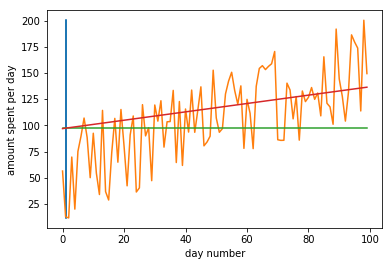

In [300]:
#plt.plot(i, bills_01, 'rx')
#plt.plot(i, bills_01)

#Plotting some test data since the current txt files are empty
temp_i = temp_i
temp_m = np.sum(np.matrix(temp_i - np.average(temp_i)).T * np.matrix(temp_bills).T) / np.sum((temp_i - np.average(temp_i)) ** 2)
temp_c = np.average(temp_bills) - temp_m * np.average(temp_i)

plt.plot(temp_i, temp_bills)
plt.plot(temp_m*temp_i + temp_c)

plt.xlabel('day number')
plt.ylabel('amount spent per day')
plt.show()

#print(i)
#print(np.average(i))
#print(c)
#print(m)

### View the budget

In [191]:
# Plot Data
def budget_image():
    # visual_expense = pd.read_excel("bills_01.xlsx")
    # Change "person 1" and "person 2" to draw names from spreadsheet
    # data = pd.DataFrame([visual_expense], index = ["person 1", "person 2"])
    
    features = list(data)
    number_of_features = len(features)
    
    values_for_person_one = data.iloc[0].tolist()
    values_for_person_one += values_for_person_one[:1]
    
    values_for_person_two = data.iloc[1].tolist()
    values_for_person_two += values_for_person_two[:1]
    
    angles = [n / float(number_of_features) * 2 * pi for n in range(number_of_features)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar = True)
    
    plt.xticks(angles[:-1], features)
    
    ax.plot(angles, values_for_person_one)
    ax.plot(angles, values_for_person_two)
    
    ax.fill(angles, values_for_person_one, '00e5ee', alpha = 0.1)
    axis.set_title("Person 1")
    plt.show()
    
    ax.fill(angles, values_for_person_two, 'b57edc', alpha = 0.1)
    axis.set_title("Person 2")
    plt.show()
    
    
#    Pie chart
#    labels = 'Rent', 'Water', 'Power', 'Retirement', 'Health Care', 'Car Insurance', 'Rent Insurance', 'PAY PERIOD'
#    sizes = [rental, wat_bill, pow_bill, ret_ded, health_ded, car_ins, rent_ins, PAY_PERIOD()]
#    explode = (0, 0, 0, 0, 0, 0, 0, 0.1)

#    fig1, ax1 = plt.subplots()
#    ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.2f%%',
#            shadow = True, startangle = 90)
#    ax1.axis('equal') # aspect ratio to make it a circle
#    plt.show()

##### Budget view function

In [317]:
def view_budget(person, data):    
    
    
#   features = list(pd.DataFrame([pd.read_excel("bills_01.xlsx")], index = ["person 1", "person 2"]))
    features = ["Rent", "Water", "Power", "Entertainment", "Health Care", "Insurance: Car", "Insurance: Housing", "Else"]
    
    data += data [:1]
    
    angles = [n / 6 * 2 * pi for n in range(6)]
    angles += angles [:1]
    
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], features)
    ax.plot(angles, data)
    ax.fill(angles, data, 'blue', alpha=0.1)

    ax.set_title(person)
    plt.show()
    
    

ValueError: x and y must have same first dimension, but have shapes (7,) and (9,)

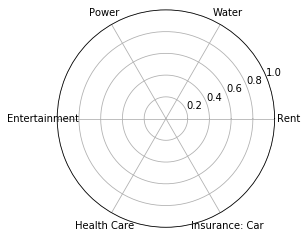

In [318]:
print(view_budget("person 1 + 2", [1250, 100, 100, 100, 300, 300, 300, 500]))

###### Gradient descent: May not use this edition and may revert to the one in the other file.

In [312]:
def gradientDescent(x, y, theta, alpha, N, iterations):
    for iter in range(iterations):
        x_transpose = x.transpose()
        hypothesis = np.dot(x_transpose, np.matrix(theta).T)
        errors = np.array(hypothesis - y)
#        cost = np.sum(errors ** 2) / (2 * N)
        
        gradient = np.dot(x, errors) / N
        # update theta
        theta = theta - alpha * gradient
    return theta


N = len(i)
temp_N = len(temp_i)
iterations = 10000
alpha = 0.005

theta = np.ones(N)
temp_theta = np.ones(temp_N)
theta = gradientDescent(temp_i, temp_bills, temp_theta, alpha, temp_N, iterations)

# Determine the capacity for what can be done in the vein of gradient descent on cost here



/usr/local/conda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


View budget graphs